<hr style="height:10px">

<div class='container2'>
    <div>
        <img src='' align='left' style='width:10em'>
    </div>    
    <div style='padding: 0 7em 2em 12em;'>
        <h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
        <div style="font-size:12pt;float:left;"> 2025/1 | 46M34 | Sala 200 CAE</div><br><br>
        <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
    </div>
</div>

<hr style="height:5px">

<h2>Atividade 2- AED salarios IA/ML - <a href="https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025/code">Salaries dataset</a> </h2>

Notebook desenvolvido por: Marcos Vinicius Silva - 202204192</a>

<hr style="height:2px">


---
## 1. Bibliotecas Necessárias para o Notebook (Aula)

Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados.
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados.
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.

Será utilizado o conjunto de dados que se encontra no diretório `datasets`, em formato de arquivo `.csv e/ou .txt`.

In [31]:
import chardet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

url = '/content/salaries.csv'

with open(url, 'rb') as f:
    result = chardet.detect(f.read())


encoding = result['encoding']
df = pd.read_csv(url, encoding=encoding)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


---
## 3. Visualização do Dataset
A visualização é necessária para entendimento do formato do dataset, colunas e tipos





In [32]:
print('\nEstatísticas para colunas numericas:')
display(df.describe())

print('\nEstatísticas para colunas não numericas:')
display(df.describe(include = object))

print('\nTipos das colunas:')
df.info()


Estatísticas para colunas numericas:


,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000



Estatísticas para colunas não numericas:


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,88584,88584,88584,88584,88584,88584,88584
unique,4,4,312,26,96,90,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,51596,88111,13156,83994,79705,79762,85667



Tipos das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


## 3.1 Eliminação de linhas duplicadas

In [33]:
# Verificando colunas nulas
display(df.isna().sum())

#Verificando linhas duplicadas
print(f"\nFormato da tabela antes de retirar itens duplicados: {df.shape}")
print(f"\nNumero de linha duplicadas: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

print(f"\nFormato da tabela após retirada dos itens duplicados: {df.shape}")

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0



Formato da tabela antes de retirar itens duplicados: (88584, 11)

Numero de linha duplicadas: 44340

Formato da tabela após retirada dos itens duplicados: (44244, 11)


## 3.2 Eliminação de atributos irrelevantes

O objetivo do projeto é fazer uma analise simples de salarios, para minimizar o numero de colunas, vamos excluir a que representa o tipo de contrato

In [34]:
df = df.drop(['employment_type'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 44244 entries, 0 to 88583
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           44244 non-null  int64 
 1   experience_level    44244 non-null  object
 2   job_title           44244 non-null  object
 3   salary              44244 non-null  int64 
 4   salary_currency     44244 non-null  object
 5   salary_in_usd       44244 non-null  int64 
 6   employee_residence  44244 non-null  object
 7   remote_ratio        44244 non-null  int64 
 8   company_location    44244 non-null  object
 9   company_size        44244 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.7+ MB


## 3.3 Alterando os valores para melhor entendimento do dataset

In [35]:
experience_mapping = {
    "EN": "Junior",
    "MI": "Pleno",
    "SE": "Senior",
    "EX": "Executivo"
}

remote_mapping = {
    0: "Presencial",
    50: "Hibrido",
    100: "Remoto"
}

company_size_mapping = {
    "S": "Pequena",
    "M": "Media",
    "L": "Grande"
}

df["experience_level"] = df["experience_level"].map(experience_mapping)
df["remote_ratio"] = df["remote_ratio"].map(remote_mapping)
df["company_size"] = df["company_size"].map(company_size_mapping)
df.head()

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,Pleno,Customer Success Manager,57000,EUR,60000,NL,Hibrido,NL,Grande
1,2025,Senior,Engineer,165000,USD,165000,US,Presencial,US,Media
2,2025,Senior,Engineer,109000,USD,109000,US,Presencial,US,Media
3,2025,Senior,Applied Scientist,294000,USD,294000,US,Presencial,US,Media
4,2025,Senior,Applied Scientist,137600,USD,137600,US,Presencial,US,Media


## 4. Visualização de dados
### 4.1 Visualização da mediana dos salarios por ano

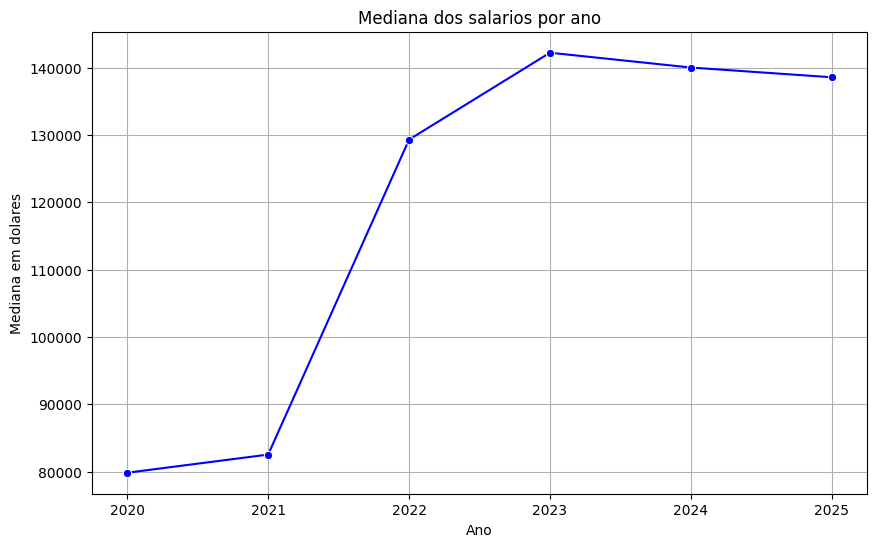

É possível enxergar o 'boom' da IA na transição de 2021 para 2022


In [36]:
salario_ano = df.groupby('work_year')['salary_in_usd'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salario_ano, marker='o', color='b')
plt.title('Mediana dos salarios por ano')
plt.xlabel('Ano')
plt.ylabel('Mediana em dolares')
plt.grid(True)
plt.xticks(salario_ano['work_year'])
plt.show()

print("É possível enxergar o 'boom' da IA na transição de 2021 para 2022")

### 4.2 Visualização de salarios x senioridade

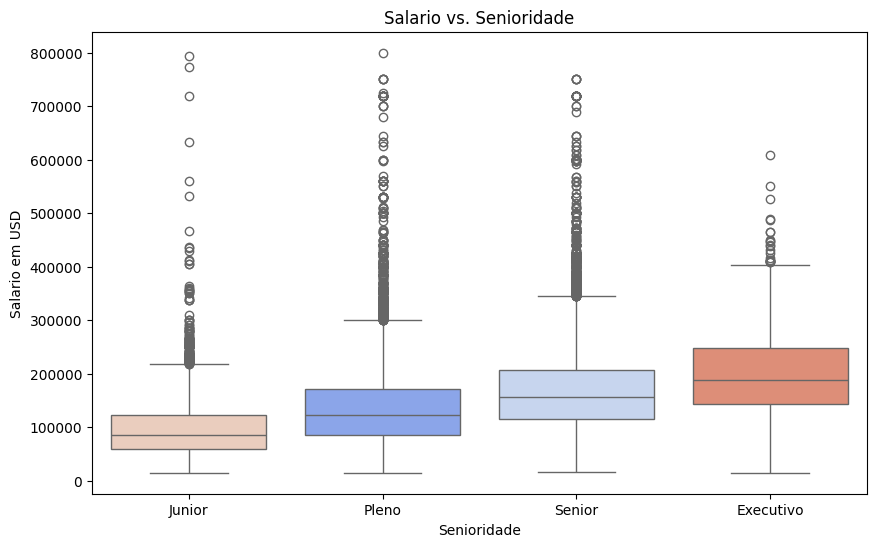

Profissionais com maior senioridade ganham mais dinheiro


In [37]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['Junior', 'Pleno', 'Senior', 'Executivo'], palette='coolwarm', hue='experience_level')
plt.title('Salario vs. Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario em USD')
plt.show()

print("Profissionais com maior senioridade ganham mais dinheiro")

## 4.2 Salarios entre os 5 cargos mais frequentes

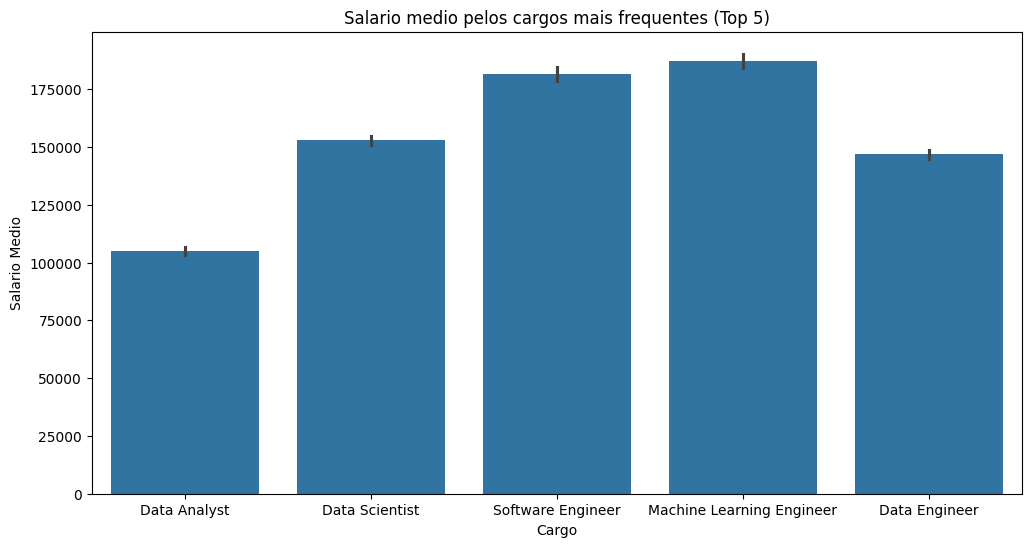

É possível ver que cargos mais tecnicos como ML Engineer e SE são mais lucrativos.


In [44]:
#cargos mais comuns
cargos_comuns = df['job_title'].value_counts().index[:5]
df_job = df[df['job_title'].isin(cargos_comuns)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_job,x='job_title', y='salary_in_usd')
plt.title('Salario medio pelos cargos mais frequentes (Top 5)')
plt.xlabel('Cargo')
plt.ylabel('Salario Medio')
plt.show()

print("É possível ver que cargos mais tecnicos como ML Engineer e SE são mais lucrativos.")

## 4.3 Salarios enviados em BRL

In [ ]:
#Verifica os tipos de moedas que participaram da pesquisa
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'CAD', 'PHP', 'INR', 'BRL', 'PLN', 'CHF',
       'TWD', 'NOK', 'SGD', 'AUD', 'JPY', 'DKK', 'CZK', 'HUF', 'MXN',
       'ILS', 'TRY', 'ZAR', 'SEK', 'NZD', 'HKD', 'THB', 'CLP'],
      dtype=object)

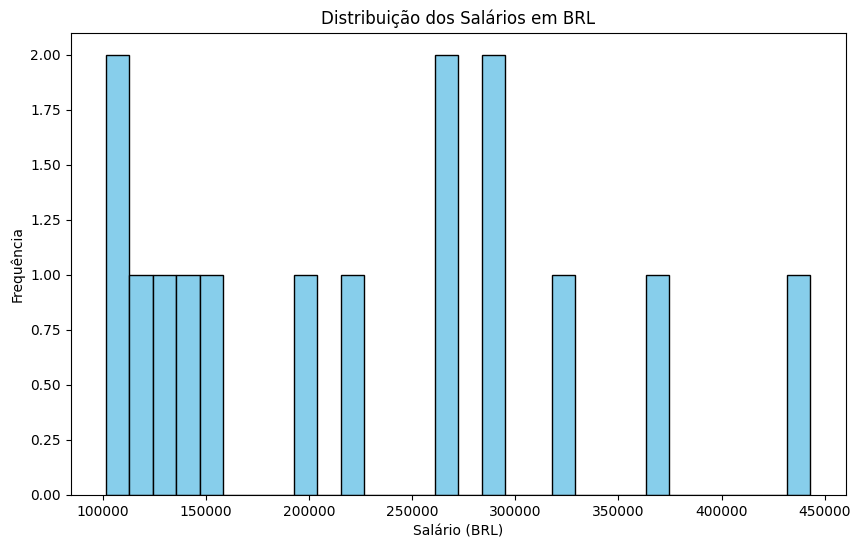

Total de participantes brasileiros 15
Maior salario em real registrado R$ 36916.67
Menor salario em real registrado R$ 8450.00
Mediana dos salarios em real R$ 18016.67


In [12]:
# Filtrando empregados que ganham em real
df_brl = df[df['salary_currency'] == 'BRL']

#Plotando o grafico

plt.figure(figsize=(10, 6))
plt.hist(df_brl['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Salários em BRL')
plt.xlabel('Salário (BRL)')
plt.ylabel('Frequência')
plt.show()

print(f'Total de participantes brasileiros {len(df_brl)}')
print(f'Maior salario em real registrado R${df_brl["salary"].max()/12: .2f}')
print(f'Menor salario em real registrado R${df_brl["salary"].min()/12: .2f}')
print(f'Mediana dos salarios em real R${df_brl["salary"].median()/12: .2f}')